In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from timeit import timeit
from scipy.stats import binom
from collections import deque


#Q1

In [2]:
class Network():
    def __init__(self,num_nodes):
        self.adj = {i:set() for i in range(num_nodes)}
        self.num_edge = 0

    def add_edge(self,i,j):
        self.adj[i].add(j)
        self.adj[j].add(i)
        self.num_edge+=1

    def neighbors (self,i):
        return self.adj[i]
    
    def edge_list(self):
        return [(i,j) for i in self.adj for j in self.adj[i] if i<j]

In [3]:
class Bernoulli_Network(Network):

    def __init__(self, num_nodes,prob):
        super().__init__(num_nodes)

        for i in range(num_nodes):
            for j in range(i+1,num_nodes):

                if np.random.binomial(1,prob):
                    self.add_edge(i,j)

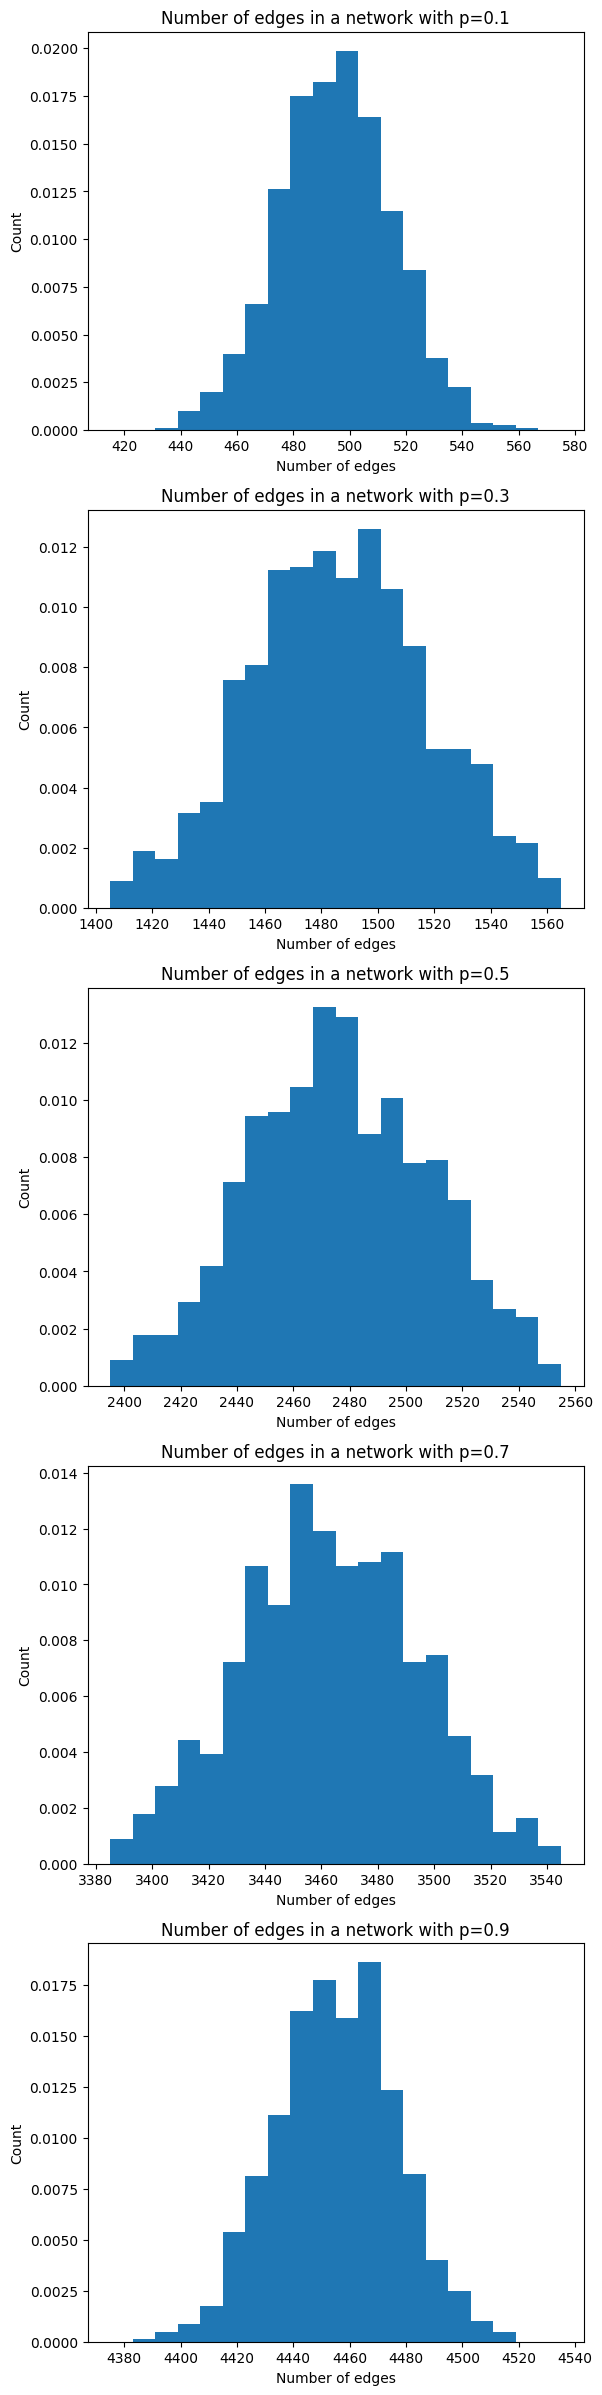

In [5]:
np.random.seed(1)

n = 100 #number of nodes
probs = [0.1,0.3,0.5,0.7,0.9]
sample_size = 1000

fig, ax = plt.subplots(nrows=len(probs),ncols=1)
fig.set_figheight(30)

m_arrays=[] #for Q2

for i,prob in enumerate(probs):
    m_array=[]

    for _ in range(sample_size):
        network = Bernoulli_Network(n,prob)
        m_array.append(network.num_edge)

    m_arrays.append(m_array)

    ax[i].hist(m_array,bins=20,range=(prob*math.comb(n,2)-80,prob*math.comb(n,2)+80),density=True)
    ax[i].set_xlabel('Number of edges')
    ax[i].set_ylabel('Count')
    ax[i].set_title('Number of edges in a network with p={}'.format(prob))

plt.show()

Q2

For probability p and number of edge 0<=m<=(nC2). Plot probability P(m)

In [6]:
def pmf_num_edge (num_nodes,prob):

    total_edge = math.comb(num_nodes,2)
    m_range = [m for m in range(total_edge+1)]

    return binom.pmf(m_range,total_edge,prob)

In [7]:
def mean(X,P_X):
    '''Mean for discrete random variable X with PDF P_X'''
    
    return sum([x*p_x for x,p_x in zip(X,P_X)])

In [8]:
def variance(X,P_X,mean):
    '''Variance for discrete random var X with PDF P_X'''
    
    return sum([p_x*(x-mean)**2 for x,p_x in zip(X,P_X)])

For p = 0.1: theoretical mean = 495.00, theoretical variance = 445.50, sample mean = 494.51, sample variance = 396.51
For p = 0.3: theoretical mean = 1485.00, theoretical variance = 1039.50, sample mean = 1486.02, sample variance = 1053.66
For p = 0.5: theoretical mean = 2475.00, theoretical variance = 1237.50, sample mean = 2476.08, sample variance = 1161.90
For p = 0.7: theoretical mean = 3465.00, theoretical variance = 1039.50, sample mean = 3462.69, sample variance = 1058.74
For p = 0.9: theoretical mean = 4455.00, theoretical variance = 445.50, sample mean = 4454.70, sample variance = 456.17


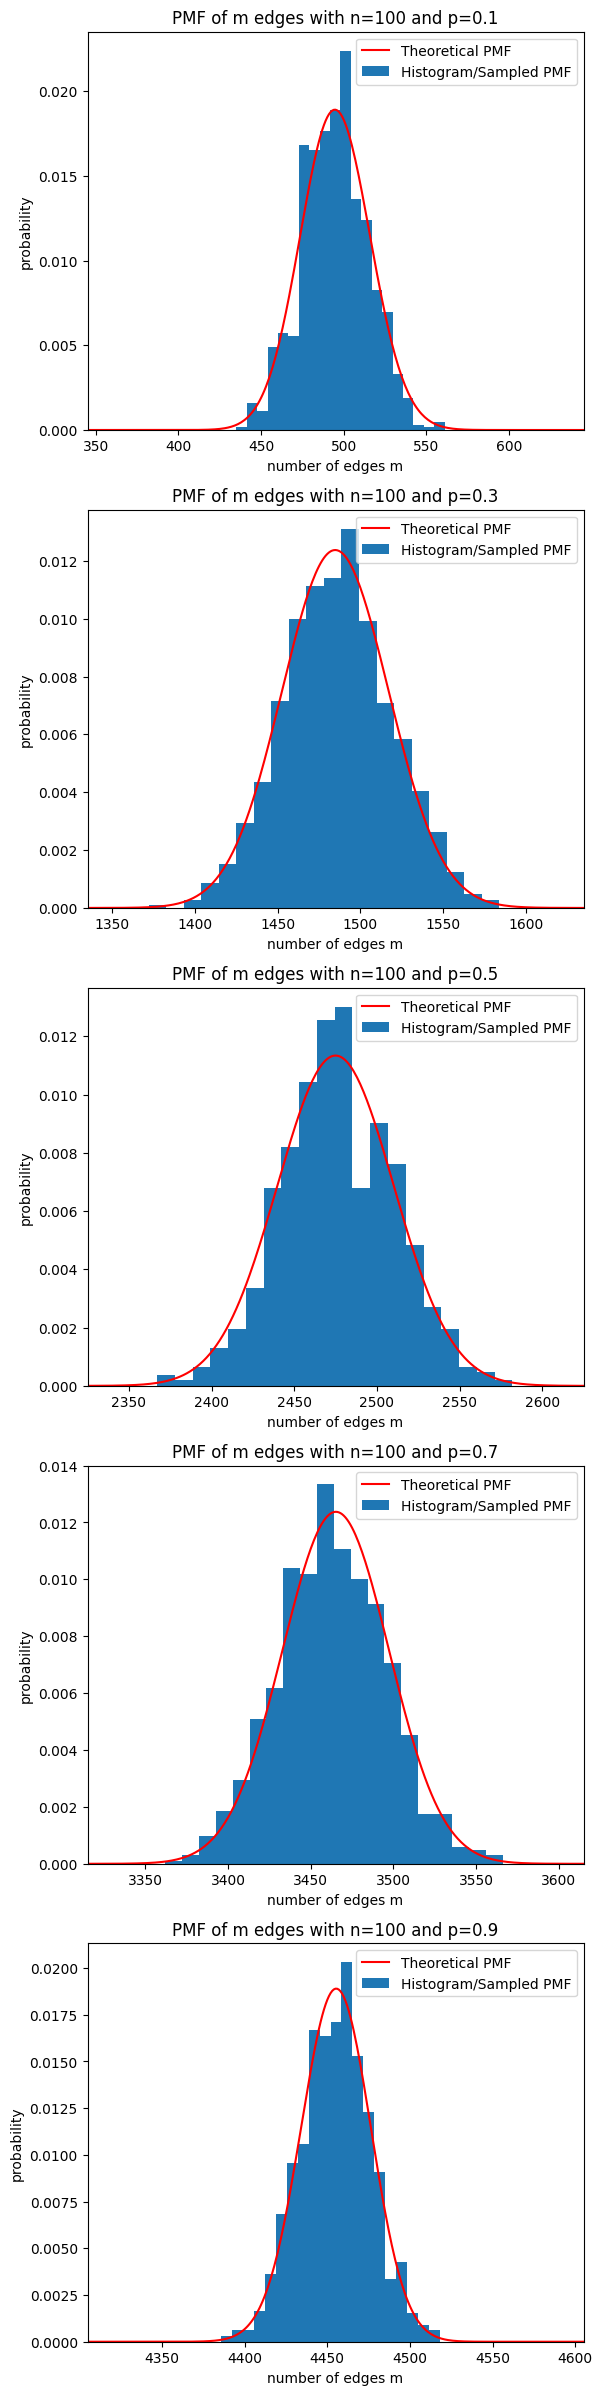

In [13]:
n = 100
probs = [0.1,0.3,0.5,0.7,0.9]
total_edge = math.comb(n,2)

fig, ax = plt.subplots(nrows=len(probs),ncols=1)
fig.set_figheight(30)

for i,prob in enumerate(probs):
    
    m_range = [m for m in range(total_edge+1)]
    p_m = pmf_num_edge(n,prob)

    ax[i].plot(m_range,p_m,color='r',label='Theoretical PMF')
    ax[i].hist(m_arrays[i],bins=20,density=True, label='Histogram/Sampled PMF')
    ax[i].set_xlabel('number of edges m')
    ax[i].set_ylabel('probability')
    ax[i].set_title('PMF of m edges with n={} and p={}'.format(n,prob))
    ax[i].set_xlim([prob*math.comb(n,2)-150,prob*math.comb(n,2)+150])
    ax[i].legend(loc='upper right')

    mn = mean(m_range,p_m)
    s_mn = np.mean(m_arrays[i])
    var = variance(m_range,p_m,mn)
    s_var = np.var(m_arrays[i])

    print('For p = {}: theoretical mean = {:.2f}, theoretical variance = {:.2f}, sample mean = {:.2f}, sample variance = {:.2f}'.format(prob,mn,var,s_mn,s_var))

plt.show()


Q3
Computing degree distribution P(k) where k is the degree of a node.

For a graph of G(n,p), 0<=k<=n-1

$$P(k) = (n-1)C_{k} * p^{k} * (1-p)^{n-1-k} $$


In [14]:
def degree_distribution(prob,num_nodes):

    k_range = [k for k in range(num_nodes)]

    return binom.pmf(k_range,num_nodes-1,prob)

For p = 0.1: mean = 9.90, variance = 8.91
For p = 0.3: mean = 29.70, variance = 20.79
For p = 0.5: mean = 49.50, variance = 24.75
For p = 0.7: mean = 69.30, variance = 20.79
For p = 0.9: mean = 89.10, variance = 8.91


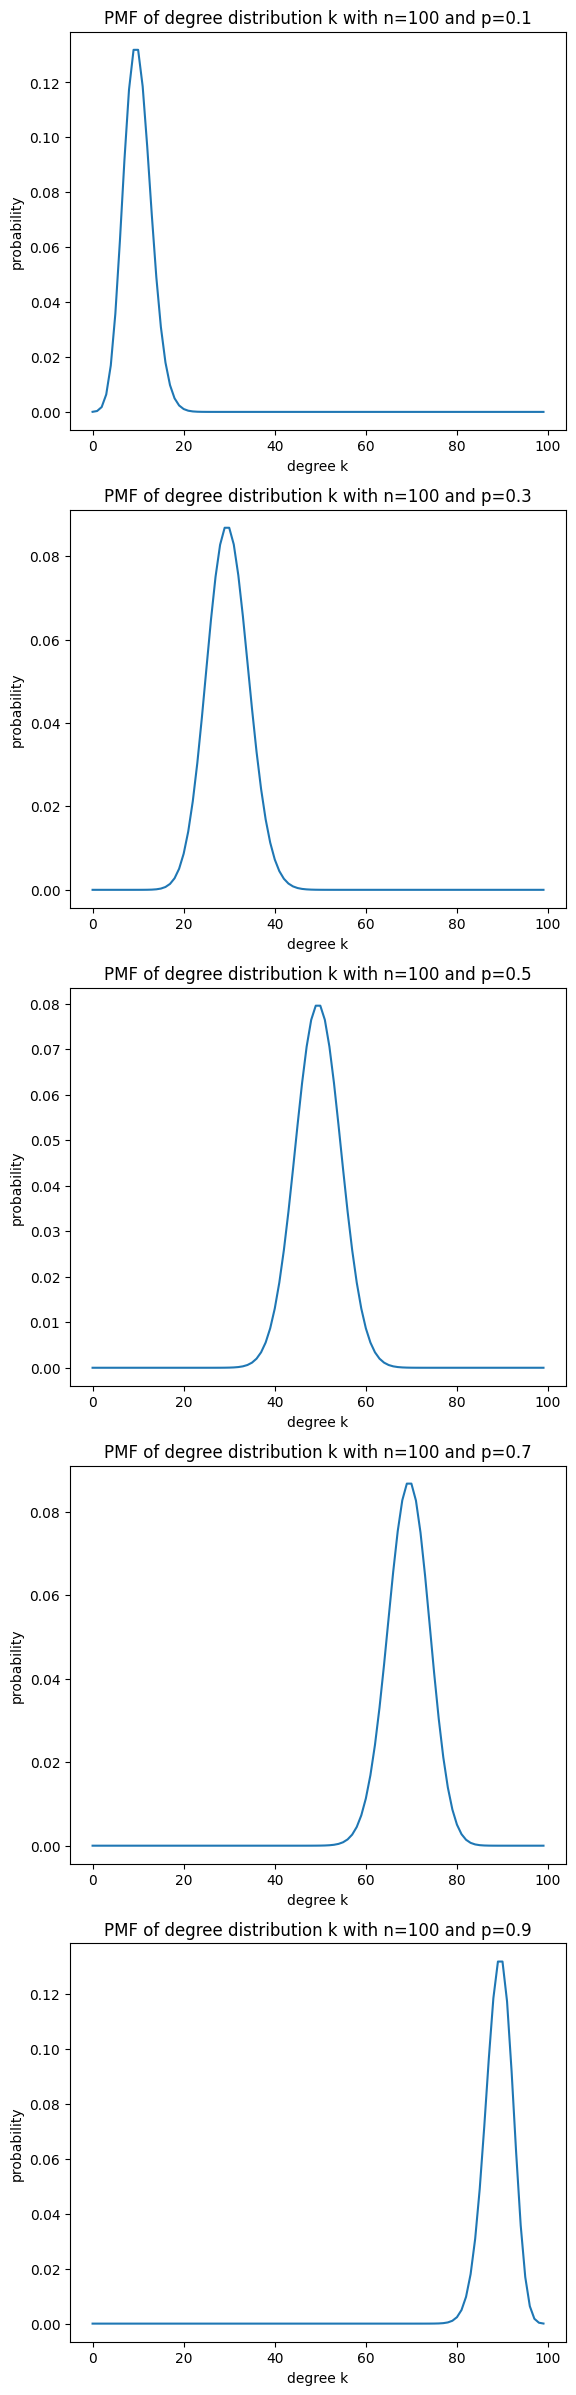

In [15]:
probs = [0.1,0.3,0.5,0.7,0.9]
n = 100

fig, ax = plt.subplots(nrows=len(probs),ncols=1)
fig.set_figheight(30)

for i,prob in enumerate(probs):

    k_range = [k for k in range(n)]
    p_k = degree_distribution(prob,n)
    
    ax[i].plot(k_range,p_k)
    ax[i].set_xlabel('degree k')
    ax[i].set_ylabel('probability')
    ax[i].set_title('PMF of degree distribution k with n={} and p={}'.format(n,prob))

    mn = mean(k_range,p_k)
    var = variance(k_range,p_k,mn)
    print('For p = {}: mean = {:.2f}, variance = {:.2f}'.format(prob,mn,var))

plt.show()


Q4

Now we let $ p = \frac{\lambda}{n-1}$
i.e 

$$ G(n, \frac{\lambda}{n-1})$$

For some constant $\lambda$.

Investigate how the PMF, mean and variance changes as n increases. 

Investigate what happens in the limit as 

$$n \rarr \infty$$

Using expression in Q3, we obtain 

$$ P(k) = (n-1)C_{k} * p^{k} * (1-p)^{n-1-k}  \\= (n-1)C_{k} * \frac{\lambda}{n-1}^{k} * (1-\frac{\lambda}{n-1})^{n-1-k} $$




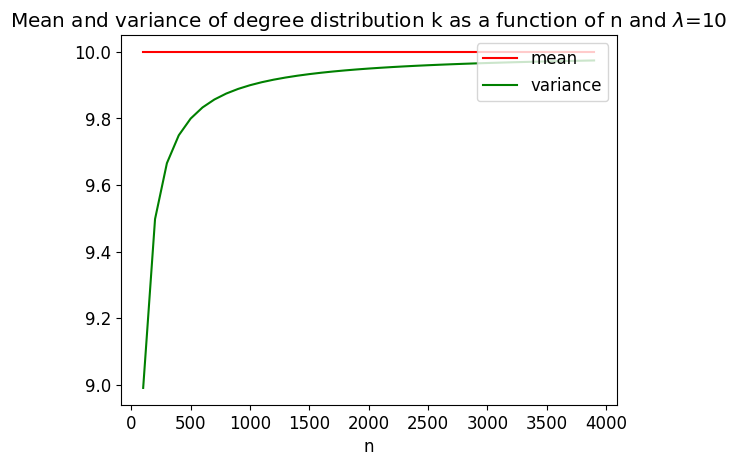

In [32]:
lmbda = 10
n_range = [n for n in range(100,4000,100)]
means = []
vars = []

for n in n_range:

    prob = lmbda/(n-1)

    k_range=[k for k in range(n)]
    p_k = degree_distribution(prob,n)

    mn = mean(k_range,p_k)
    means.append(mn)
    vars.append(variance(k_range,p_k,mn))

plt.rcParams.update({'font.size': 12})
plt.plot(n_range,means,label='mean',color='r')
plt.plot(n_range,vars,label='variance',color='g')
plt.xlabel('n')
plt.title(r'Mean and variance of degree distribution k as a function of n and $\lambda$={}'.format(lmbda))
plt.legend(loc='upper right')
plt.show()


    

We observe that mean is always constant and equal to $\lambda$. However, as n increase, p decreases and variance increases but appears to reach an asymptote of $\lambda$. 

Q5, two stage algorithm.

For a graph 

$$G(n,p)$$

Stage 1: 

Generate value $m$, number of edges according to PMF in Q3.

https://compphys.notes.dmaitre.phyip3.dur.ac.uk/lectures/lecture-5/probability-distributions/#:~:text=By%20inverting%20the%20cumulative%20function,making%20these%20values%20more%20likely.&text=xis%20%3D%20numpy.,times%20%3D%20-%20tau%20*%20numpy.

^ If interested in applying monte carlo rejection sampling etc. 

Stage 2:

Add m edges uniformly to the network. 

In [17]:
class Two_Stage_Network(Network):

    def __init__(self, num_nodes,prob):
        super().__init__(num_nodes)

        #stage 1
        total_edge = math.comb(num_nodes,2)
        m = np.random.binomial(total_edge,prob)

        #stage 2
        while self.num_edge!=m:

            i, j = np.random.randint(0, num_nodes,2)

            if i!=j and j not in self.neighbors(i):
                self.add_edge(i,j)   

Q6

For $$n^{k} : k=6,7,...,10$$

Generate graphs 

$$G(n,p)$$

according to Q1, a naive algo and Q4, sampling m then generating graph$

Then time the two algorithms

In [21]:
pows = 2**np.array(range(6,11))
lmbda = 10
timer_runs = 50
time_naive_list = []
time_two_stage_list = []


for n in pows:
    p = lmbda/(n-1)

    total_edges = math.comb(n,2)
    m_range = [m for m in range(total_edges+1)]

    #Naive generation 
    time_naive = timeit(lambda: Bernoulli_Network(n,p), number=timer_runs)

    #Alternate generation
    time_two_stage = timeit(lambda: Two_Stage_Network(n,p),number=timer_runs)

    #taking logs of power2
    time_naive_list.append(time_naive)
    time_two_stage_list.append(time_two_stage)
    


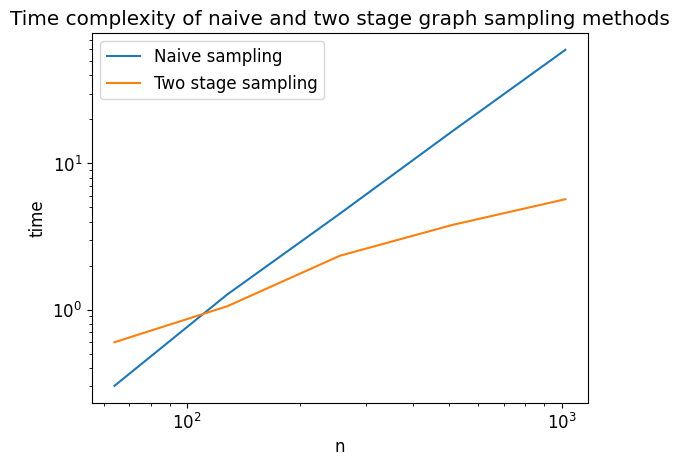

In [22]:
plt.loglog(pows,time_naive_list,label='Naive sampling')
plt.loglog(pows,time_two_stage_list, label='Two stage sampling')
plt.title('Time complexity of naive and two stage graph sampling methods')
plt.xlabel('n')
plt.ylabel('time')
plt.legend()
plt.show()

Q7 

Investigating the size of component as a function of p.

Let $n=4096$ and $p=[0,0.001]$. Plot how the average size of the component containing node 1 changes as p varies, especially when $p\approx \frac{1}{n-1}$

1. First we generate sample according to alternate generation 
2. Then carry our Breadth First Search to find all nodes reachable from node 1, which will be the size of the component containing node 1
3. Repeat step 1,2 by varying p and plot a graph of component size against p
4. Mark x axis where $p\approx \frac{1}{n-1}$

https://www.ndsu.edu/pubweb/~novozhil/Teaching/767%20Data/36_pdfsam_notes.pdf

In [30]:
n = 4096
probs = np.linspace(0,0.001,num=15)
runs = 50
comp_size_array_avg = []

for prob in probs:

    component_size_array=[]

    for _ in range(runs):

        graph = Two_Stage_Network(n,prob)

        component_size = 0
        visited=set()

        q=deque([0])

        while q:
            curr = q.popleft()
            visited.add(curr)

            for adj in graph.neighbors(curr):
                if adj not in visited:
                    component_size+=1
                    q.append(adj)

        component_size_array.append(component_size)

    comp_size_array_avg.append(np.mean(component_size_array)/n)


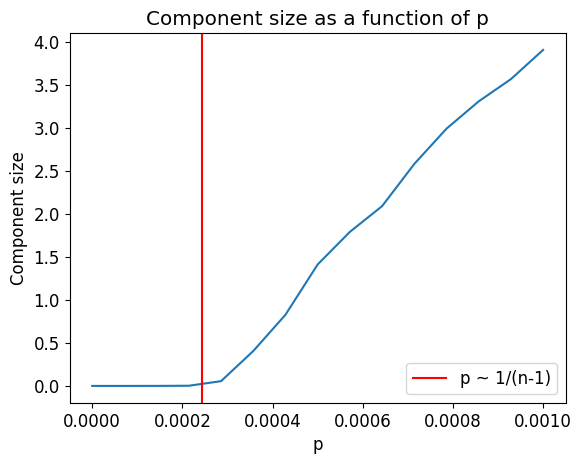

In [31]:
plt.plot(probs,comp_size_array_avg)
plt.axvline(1/(n-1),color='r',label='p ~ 1/(n-1)')
plt.title('Component size as a function of p')
plt.ylabel('Component size')
plt.xlabel('p')
plt.legend()
plt.show()